In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [6]:
iteration_number = 1
folder_path = f"EE-GACalifornia/Iteration_{iteration_number}"

In [7]:
def getFitnessValues(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    txt_files = [f for f in files if f.endswith('.txt')]
    fileNumber = len(txt_files)
    
    lowest_fitness_values = []
    highest_fitness_values = []
    average_fitness_values = []
    
    for i in range(1, fileNumber + 1):
        
        with open(f'{folder_path}/Gen_{i}.txt', 'r') as file:
            lines = file.readlines()
        
            for line in lines:
                if 'Lowest Fitness' in line:
                    # Extract the value after the keyword, assuming it's space-separated
                    try:
                        # Extract the number from the line
                        fitness_value = float(line.split()[-1])
                        lowest_fitness_values.append(fitness_value)
                    except ValueError:
                        print(f"Could not convert fitness value to float: {line}")
                        print("None")
                elif 'Highest Fitness' in line:
                    # Extract the value after the keyword, assuming it's space-separated
                    try:
                        # Extract the number from the line
                        fitness_value = float(line.split()[-1])
                        highest_fitness_values.append(fitness_value)
                    except ValueError:
                        print(f"Could not convert fitness value to float: {line}")
                        print("None")

                elif 'Average Fitness' in line:
                    # Extract the value after the keyword, assuming it's space-separated
                    try:
                        # Extract the number from the line
                        fitness_value = float(line.split()[-1])
                        average_fitness_values.append(fitness_value)
                    except ValueError:
                        print(f"Could not convert fitness value to float: {line}")
                        print("None")

    return lowest_fitness_values, highest_fitness_values, average_fitness_values

In [8]:
lowest_fitness_values, highest_fitness_values, average_fitness_values = getFitnessValues(folder_path)

In [19]:
def draw_plot(lowest_fitness_values, average_fitness_values, save_path):
    # Create an array of generations (assuming each value corresponds to a generation)
    generations = np.arange(1, len(lowest_fitness_values) + 1)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the lowest fitness values
    plt.plot(generations, lowest_fitness_values, marker='o', linestyle='-', color='blue', label='Lowest Fitness')

    # Plot the average fitness values
    plt.plot(generations, average_fitness_values, marker='o', linestyle='-', color='green', label='Average Fitness')

    # Adding titles and labels
    plt.title('Fitness Progression Across Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Value')
    plt.xticks(generations)  # Ensure all generations are shown on x-axis
    plt.ylim(0.45, 0.55)  # Set limits for the y-axis
    plt.grid(True)

    # Adding a legend
    plt.legend()

    # Save the plot
    plt.savefig(save_path)
    plt.show()

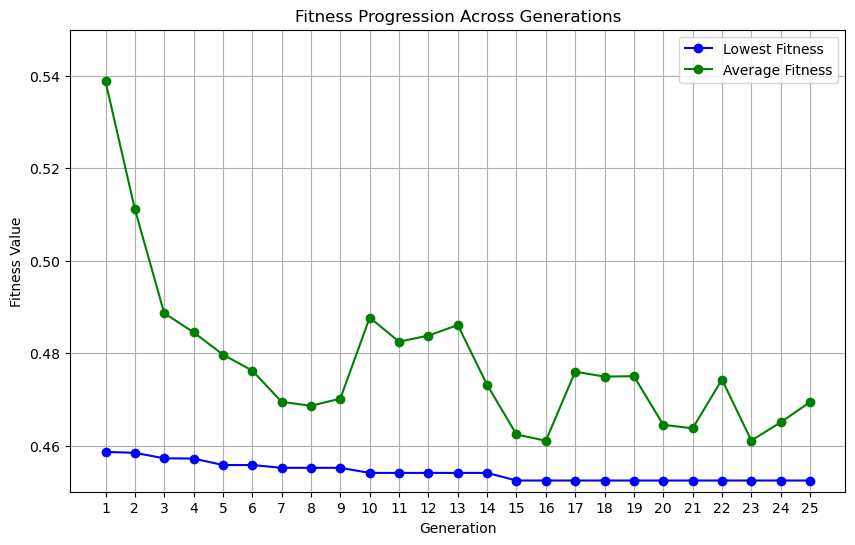

In [21]:
draw_plot(lowest_fitness_values, average_fitness_values, f"{folder_path}/Temop.png")